# Grafos
Un grafo es formalmente una pareja $(V, E)$ de conjuntos $V$ de *vertices* y $E \subseteq \binom{V}{2}$ de *aristas*

Operación         |Hash de adyacencia |Lista de incidencia|Matriz de adyacencia|
------------------|-------------------|-------------------|--------------------|
Memoria           |$O(n+m)$           |$O(n+m)$           |$O(n^2)$            |
Agregar vértice   |$O(1)$             |$O(1)$             |$O(n^2)$            |
Eliminar vértice  |$O(n)$             |$O(n+m)$           |$O(n^2)$            |
Agregar arista    |$O(1)$             |$O(n)$             |$O(1)$              |
Eliminar arista   |$O(1)$             |$O(m)$             |$O(1)$              |
Consultar vértice |$O(1)$             |$O(n)$             |$O(1)$              |
Consultar arista  |$O(1)$             |$O(m)$             |$O(1)$              |
Iterar vértices   |$O(n)$             |$O(n)$             |$O(n)$              |
Iterar aristas    |$O(n+m)$           |$O(m)$             |$O(n^2)$            |
Iterar vecinos    |$O(n)$             |$O(n+m)$           |$O(n)$              |

In [1]:
G = {
    'A':{'B','C'},
    'B':{'A','C'},
    'C':{},
    'D':{}
    
}

## Uso de NetworkX

In [2]:
import networkx as nx
from itertools import product
import numpy as np
from random import random

In [3]:
G = nx.Graph()

In [4]:
G.add_nodes_from(list('ABCD'))
G.nodes

NodeView(('A', 'B', 'C', 'D'))

In [5]:
G.add_edges_from([('A','C'),('B','A'),('C','D')])
G.edges

EdgeView([('A', 'C'), ('A', 'B'), ('C', 'D')])

In [6]:
G.add_path(['A','B','C'])

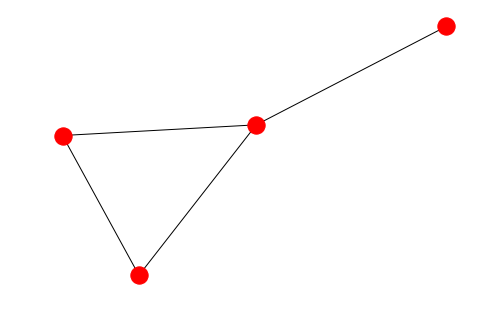

In [10]:
nx.draw(G)

In [11]:
def grafo_completo(n:int):
    X = range(n)
    E = product(X,X)
    G = nx.Graph(E)
    G.add_nodes_from(X)
    return G

In [12]:
def grafo_completo(n:int):
    E = list()
    for i in range(n):
        for j in range(n):
            E.append((i,j))
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(E)
    return G

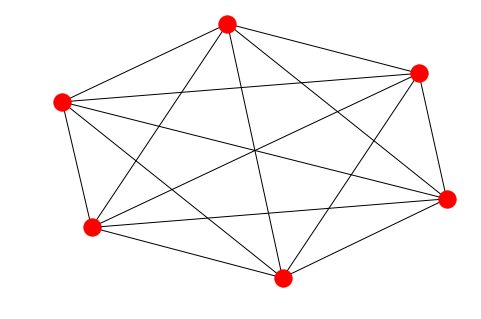

In [13]:
C = grafo_completo(6)
nx.draw(C)

In [14]:
def grafo_bipartito(n1:int,n2:int):
    X = range(n1)
    Y = range(n1, n1 + n2)
    E = product(X, Y)
    G = nx.Graph(E)
    G.add_nodes_from(X)
    G.add_nodes_from(Y)
    return G

In [21]:
def grafo_bipartito(n1:int,n2:int):
    E = list()
    for i in range(n1):
        for j in range(n1,n1+n2):
            E.append((i,j))
    G = nx.Graph()
    G.add_nodes_from(range(n1))
    G.add_nodes_from(range(n1,n1+n2))
    G.add_edges_from(E)
    return G

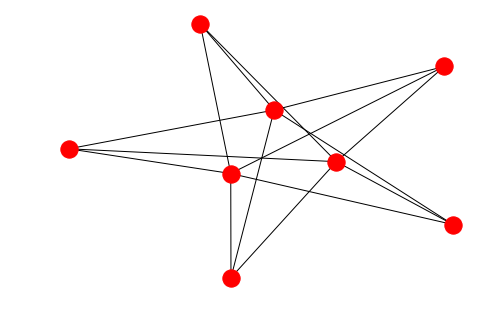

In [22]:
B = grafo_bipartito(5, 3)
nx.draw(B)

In [23]:
def grafo_aleatorio(n:int,p:float):
    E = list()
    for i in range(n):
        for j in range(n):
            if(random()<p):
                E.append((i,j))
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(E)
    return G

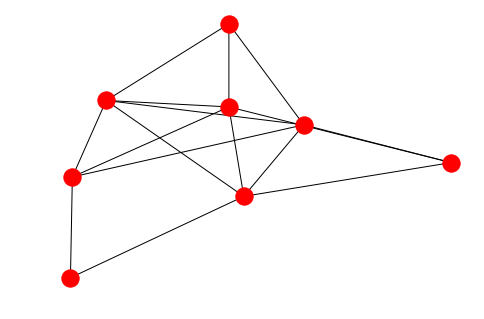

In [24]:
G_A = grafo_aleatorio(8, 0.4)
nx.draw(G_A)

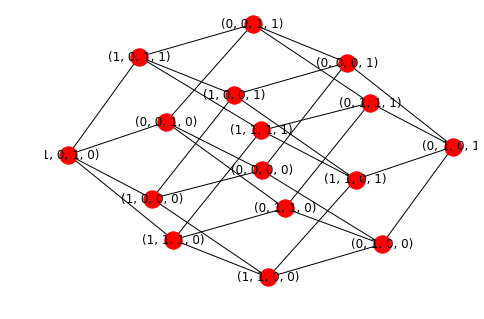

In [25]:
#Node labels are the integers 0 to 2**n - 1.
G = nx.hypercube_graph(4)
nx.draw(G,with_labels=True)

In [26]:
def a_binario(n: int,dim: int):
    digitos = 2**n
    pantilla = '{:0' + str(digitos) + 'b}'
    numero = pantilla.format(n)
    a = list(s)
    c = list(b)
    if len(a) < len(c):
        a.extend([0]*(len(c)-len(a)))
    elif len(c) < len(a):
        c.extend([0]*(len(a)-len(c)))
    A = str(a.reverse())
    B = str(c.reverse())
    return numero

In [27]:
def difiere_un_digito(s: str, b: str):
    count = 0
    for tupla in zip(A,B):
        count += int(tupla[0] != tupla[1])
    if count > 1:
        return True
    else:
        return False

In [28]:
def grafo_cubo(n_dim: int) -> nx.Graph:
    G = nx.Graph()
    G.add_nodes_from([a_binario(v,n_dim) for v in range(2**n_dim)])
    
    for u in G.nodes:
        for v in G.nodes:
            if difiere_un_digito(u,v):
                G.add_edge(u,v)
    return G

In [29]:
G_CU = grafo_cubo(2)
nx.draw(G_CU)

NameError: name 's' is not defined

In [30]:
def es_conexa(G:nx.Graph):
    def visitar(u):
        nonlocal tiempo
        descubrimiento[u] = tiempo
        tiempo += 1
        for v in G.neighbors(u):
            if not v in descubrimiento:
                visitar(v)
    
    raiz = next(iter(G.nodes))
    tiempo, descubrimiento = 0, {}
    visitar(raiz)
    
    for u in G.nodes:
        if u not in descubrimiento:
            return False
    return True,descubrimiento

(True, {0: 0, 1: 1, 4: 2, 2: 3, 5: 4, 3: 5, 7: 6, 6: 7})

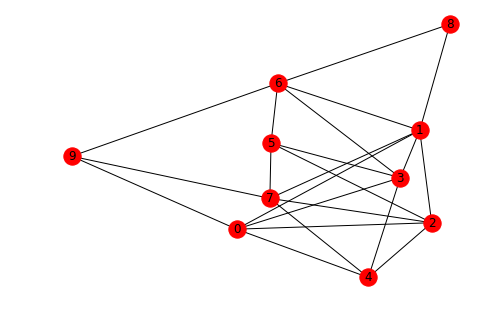

In [31]:
G = grafo_aleatorio(10,0.3)
nx.draw(G,with_labels=True)
es_conexa(G_A)

In [66]:
def prob_conexa(n: int, p: float, k: int):
    num = 0
    for  i in range(k):
        grafo = grafo_aleatorio(n,p)
        if es_conexa(grafo):
            num += 1
    return num/k

In [67]:
for p in np.linspace(0, 1, 50):
    prob_conexa(10,p,400)

In [68]:
x = np.linspace(0, 1, 50)
y = [prob_conexa(10,p,400) for p in x]

fig, ax = plt.subplots()
ax.plot(x, y)
fig.show()

NameError: name 'plt' is not defined

In [ ]:
np.linspace(3, 7, 10)